In [37]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [38]:
data = pd.read_csv("Data/ucsdWShotsConceded.csv").reset_index()
data.dropna(inplace=True)

In [39]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side
0,1,SDSU,1.0,Pass,Unsuccessful,"[16.09523809523808, 5.523809523809533]","[34.57142857142856, 7.238095238095241]",UCSD,17,16.095238,5.523810,34.571429,7.238095,left
1,3,SDSU,1.0,Pass,Successful,"[37.61904761904761, 7.238095238095241]","[15.904761904761891, 28.57142857142857]",Opponent,17,37.619048,7.238095,15.904762,28.571429,left
2,5,SDSU,1.0,Shot(foot),Unsuccessful,"[13.999999999999986, 26.095238095238102]","[2.3809523809523725, 40.761904761904766]",Opponent,17,14.000000,26.095238,2.380952,40.761905,left
3,6,SDSU,2.0,Pass,Unsuccessful,"[29.619047619047613, 7.80952380952381]","[54.19047619047618, 26.47619047619048]",UCSD,17,29.619048,7.809524,54.190476,26.476190,left
4,8,SDSU,2.0,Pass,Successful,"[52.28571428571427, 28.38095238095238]","[38.57142857142856, 18.85714285714286]",Opponent,17,52.285714,28.380952,38.571429,18.857143,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,792,LBSU,115.0,Pass,Successful,"[79.52380952380952, 41.142857142857146]","[89.61904761904759, 26.66666666666667]",Opponent,3,40.476190,38.857143,30.380952,53.333333,right
459,793,LBSU,115.0,Shot(foot),Unsuccessful,"[86.57142857142856, 25.714285714285722]","[118.19047619047618, 40.952380952380956]",Opponent,3,33.428571,54.285714,1.809524,39.047619,right
460,794,LBSU,116.0,Throw-in,Successful,"[92.66666666666666, 0.0]","[98.19047619047618, 17.14285714285714]",Opponent,3,27.333333,80.000000,21.809524,62.857143,right
461,795,LBSU,116.0,Pass,Successful,"[99.14285714285714, 23.23809523809524]","[97.61904761904762, 37.714285714285715]",Opponent,3,20.857143,56.761905,22.380952,42.285714,right


In [40]:
opportunityGoals = []
for i in range(1,int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[-1]
    if ("Shot" in limited.get("Event"))and (limited.get("Result") =="Successful"):
        opportunityGoals.append(i)
def addGoal(num):
    if num in opportunityGoals:
        return True
    else:
        return False
opportunities = opportunities.assign(resultGoal = opportunities.get("numOpportunity").apply(addGoal))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116


Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

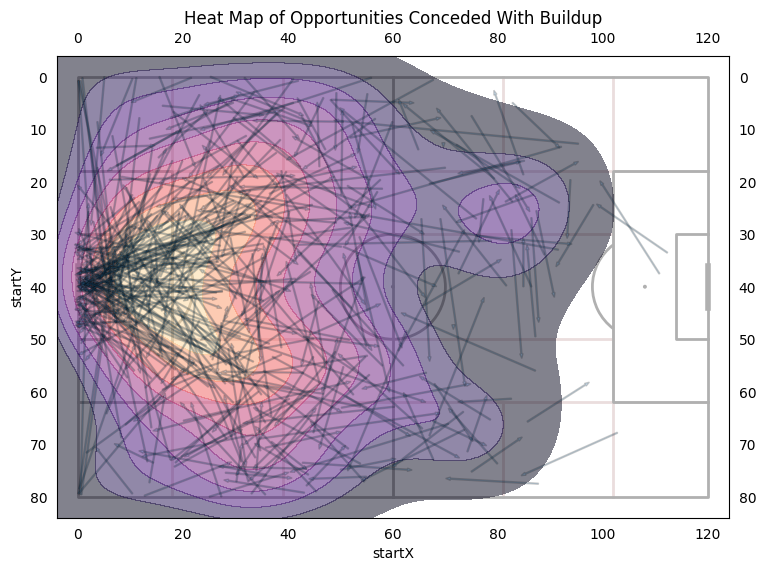

In [41]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [42]:
origins =[]
for i in range(1,int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [43]:
origins.head(60)

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side,resultGoal
0,1,SDSU,1.0,Pass,Unsuccessful,"[16.09523809523808, 5.523809523809533]","[34.57142857142856, 7.238095238095241]",UCSD,17,16.095238,5.523810,34.571429,7.238095,left,False
3,6,SDSU,2.0,Pass,Unsuccessful,"[29.619047619047613, 7.80952380952381]","[54.19047619047618, 26.47619047619048]",UCSD,17,29.619048,7.809524,54.190476,26.476190,left,False
8,16,SDSU,3.0,Throw-in,Successful,"[12.666666666666657, 79.80952380952381]","[28.47619047619046, 73.71428571428572]",Opponent,17,12.666667,79.809524,28.476190,73.714286,left,False
11,22,SDSU,4.0,Pass,Successful,"[112.28571428571428, 33.523809523809526]","[99.52380952380952, 24.76190476190476]",Opponent,17,112.285714,33.523810,99.523810,24.761905,left,False
21,42,SDSU,5.0,Pass,Unsuccessful,"[30.761904761904752, 21.904761904761912]","[52.28571428571427, 17.33333333333333]",UCSD,8,30.761905,21.904762,52.285714,17.333333,left,False
25,50,SDSU,6.0,Tackle,Successful,"[44.09523809523808, 33.714285714285715]","[-1, -1]",Opponent,11,44.095238,33.714286,-1.000000,-1.000000,left,False
27,54,SDSU,7.0,Throw-in,Unsuccessful,"[94.76190476190476, 80.0]","[77.8095238095238, 72.95238095238095]",UCSD,17,25.238095,0.000000,42.190476,7.047619,right,False
33,66,SDSU,8.0,Pass,Unsuccessful,"[109.23809523809524, 43.23809523809524]","[85.8095238095238, 47.04761904761905]",UCSD,14,10.761905,36.761905,34.190476,32.952381,right,False
40,80,SDSU,9.0,Pass,Unsuccessful,"[53.04761904761903, 59.61904761904762]","[36.47619047619046, 63.61904761904762]",UCSD,17,66.952381,20.380952,83.523810,16.380952,right,False
49,98,SDSU,10.0,Tackle,Successful,"[51.33333333333332, 16.76190476190476]","[-1, -1]",Opponent,10,68.666667,63.238095,121.000000,81.000000,right,False


Text(0.5, 1.0, 'Opponent Shots Origin')

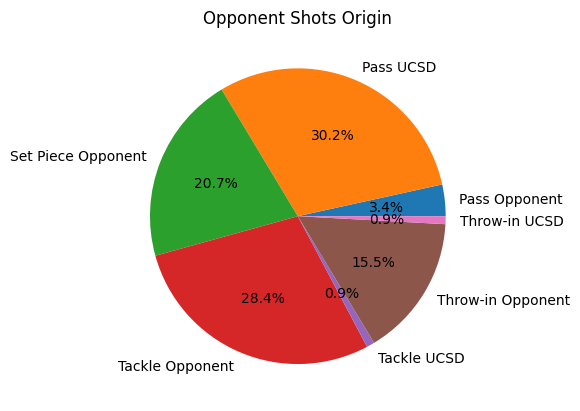

In [44]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shots Origin")

In [45]:
origins[origins.get("Event")=="Set Piece"].shape[0]

24

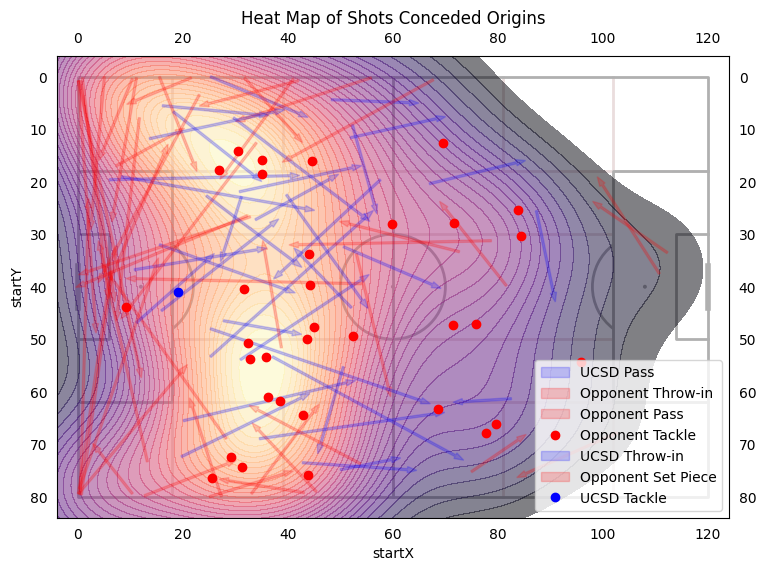

In [46]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 35,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


,TurnoversToShots
Player,
17,9
8,8
6,8
3,8
14,7
10,6
13,6
7,5
1,2


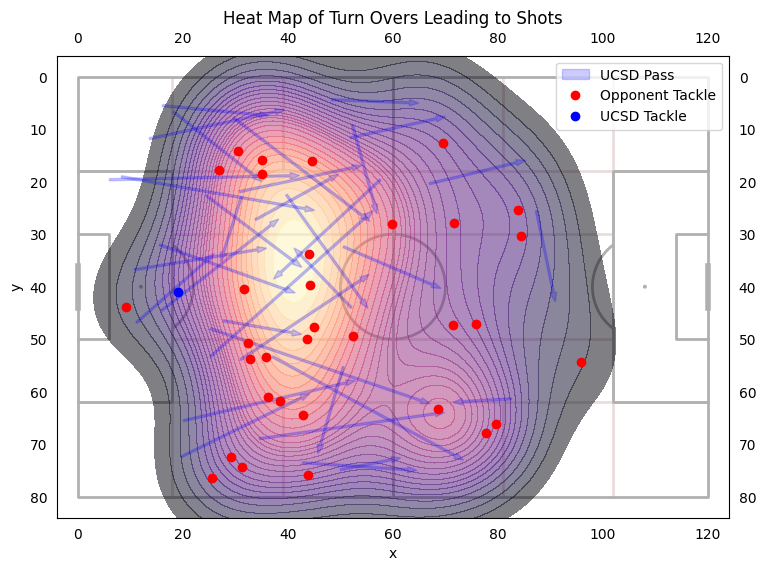

In [47]:
turnovers = origins[((origins.get("Event")=="Pass")&(origins.get("Result")=="Unsuccessful"))|(origins.get("Event")=="Tackle")]
playerTurnOvers = turnovers.groupby("Player").count()
playerTurnOvers = playerTurnOvers.assign(TurnoversToShots = playerTurnOvers.get("index")).get(["TurnoversToShots"]).sort_values("TurnoversToShots",ascending = False)
locations = []
for i in range(turnovers.shape[0]):
     row = turnovers.iloc[i]
     if row.get("Event") == "Pass":
          positions = [row.get("endX"),row.get("endY")]
     else:
          positions = [row.get("startX"),row.get("startY")]
     locations.append(positions)
locations = pd.DataFrame(locations,columns=["x","y"])

pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=locations.get("x"),y=locations.get("y"),fill = True,shade_lowest = False,alpha = .5,n_levels = 30,cmap = "magma")

for i in range(turnovers.shape[0]):
    row = turnovers.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Turn Overs Leading to Shots")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
playerTurnOvers

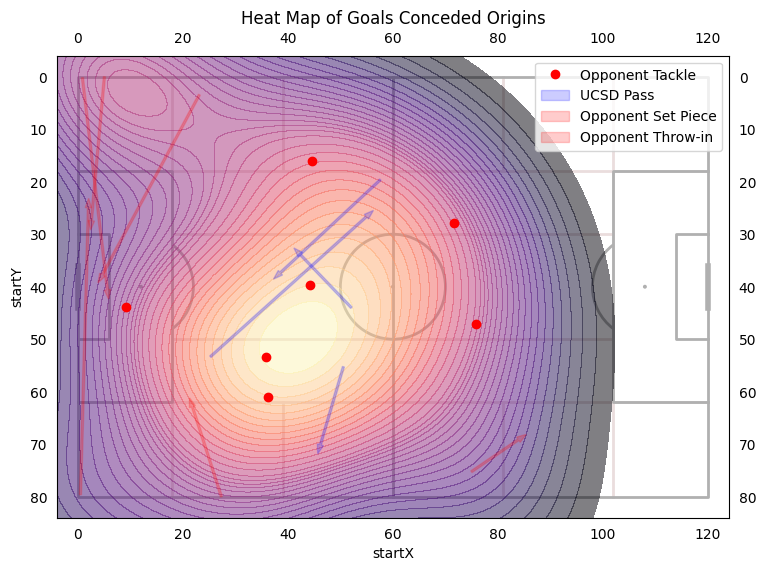

,TurnoversToGoals
Player,
3,3
17,2
1,1
10,1
23,1
4,1
7,1
8,1


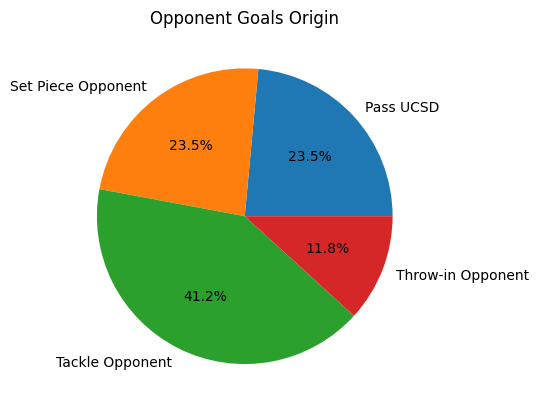

In [66]:
originsGoals = origins[origins.get("resultGoal")]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=originsGoals.get("startX"),y=originsGoals.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 35,cmap = "magma")

for i in range(originsGoals.shape[0]):
    row = originsGoals.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Goals Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.show()

originCounts = originsGoals.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Goals Origin")

turnovers = originsGoals[((originsGoals.get("Event")=="Pass")&(originsGoals.get("Result")=="Unsuccessful"))|(originsGoals.get("Event")=="Tackle")]
playerTurnOvers = turnovers.groupby("Player").count()
playerTurnOvers = playerTurnOvers.assign(TurnoversToGoals = playerTurnOvers.get("index")).get(["TurnoversToGoals"]).sort_values("TurnoversToGoals",ascending = False)
playerTurnOvers

In [48]:
tts = turnovers.groupby("Game").count()
tts = tts.assign(TurnOversToShots = tts.get("Event")).get(["TurnOversToShots"]).sort_values("TurnOversToShots",ascending=False)
tts

,TurnOversToShots
Game,
Pepperdine,11
Cal,9
SDSU,9
UCSB,9
Washington State,8
LBSU,6
SF,6
Nevada,4
CBU,3


69

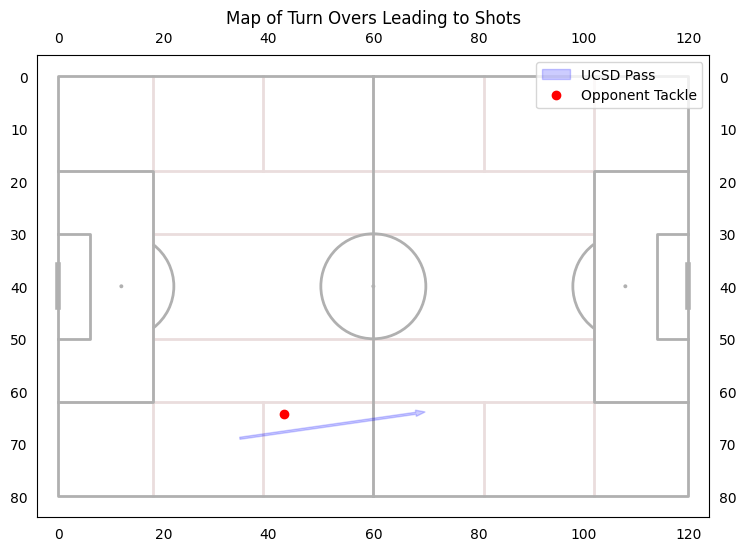

In [49]:
num = 15
specific = turnovers[turnovers.get("Player")==str(num)]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)

for i in range(specific.shape[0]):
    row = specific.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Map of Turn Overs Leading to Shots")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
playerTurnOvers.get("TurnoversToShots").sum()

115

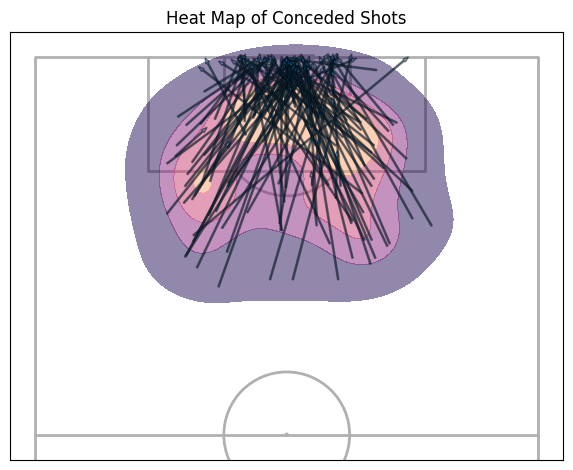

In [50]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Conceded Shots")
shots.shape[0]

In [51]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
shotAssists

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result
0,1.0,SDSU,Opponent,Pass,Successful,37.619048,7.238095,15.904762,28.571429,Unsuccessful
1,2.0,SDSU,Opponent,Pass,Successful,40.285714,25.714286,34.761905,42.095238,Unsuccessful
2,3.0,SDSU,Opponent,Pass,Successful,27.904762,50.285714,37.809524,41.333333,Unsuccessful
3,4.0,SDSU,UCSD,Tackle,Successful,18.952381,44.000000,23.333333,51.809524,Unsuccessful
4,5.0,SDSU,Opponent,Pass,Successful,50.190476,32.380952,27.333333,29.523810,Unsuccessful
...,...,...,...,...,...,...,...,...,...,...
110,112.0,LBSU,UCSD,Tackle,Successful,2.952381,27.619048,4.857143,35.238095,Successful
111,113.0,LBSU,UCSD,Tackle,Successful,6.000000,40.000000,7.714286,36.190476,Unsuccessful
112,114.0,LBSU,Opponent,Pass,Successful,12.857143,59.238095,18.571429,53.142857,Unsuccessful
113,115.0,LBSU,Opponent,Pass,Successful,40.476190,38.857143,30.380952,53.333333,Unsuccessful


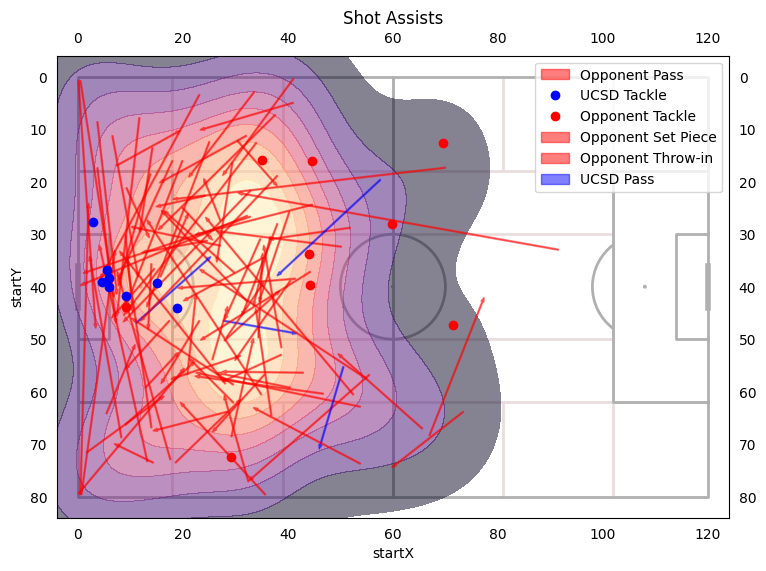

In [52]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

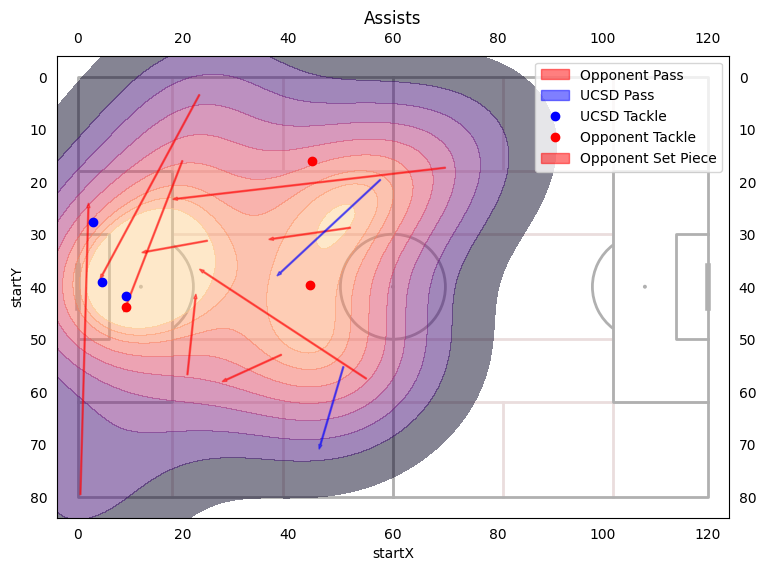

In [53]:
assists = shotAssists[shotAssists.get("Shot result")=="Successful"]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=assists.get("startX"),y=assists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(assists.shape[0]):
    row = assists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Assists")
plt.show()

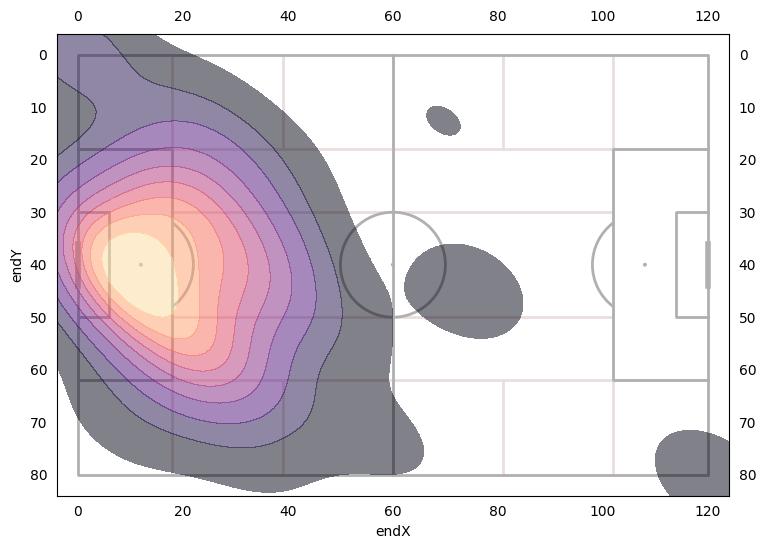

In [54]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("endX"),y=shotAssists.get("endY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

In [55]:
oppPassShotAssists = shotAssists[(shotAssists.get("Event")=="Pass")&(shotAssists.get("Team")=="Opponent")]
oppPassShotAssists = oppPassShotAssists.assign(Side = oppPassShotAssists.get("startY").apply(lambda y:"Left" if y<40 else "Right"))
oppPassShotAssists.groupby("Side").count()

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result
Side,,,,,,,,,,
Left,40,40,40,40,40,40,40,40,40,40
Right,38,38,38,38,38,38,38,38,38,38


Text(0.5, 1.0, 'Distribution of # Passes in Each of Opponents Scoring Opportunities')

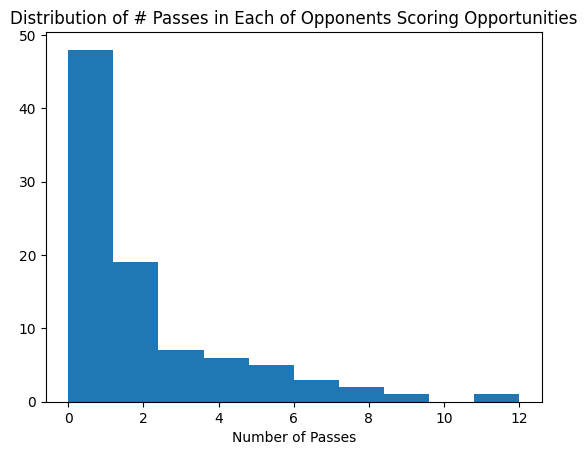

In [56]:
freeKickOpps = origins[origins.get("Event")=="Set Piece"].get("numOpportunity").values.tolist()

passesPerOpp = []
for i in range(0,int(opportunities.get("numOpportunity").max())):
    if i in freeKickOpps:
        continue
    limited = opportunities[opportunities.get("numOpportunity")==i]
    limited = limited[(limited.get("Event")=="Pass")&(limited.get("Team")=="Opponent")]
    num = limited.shape[0]
    passesPerOpp.append(num)
plt.hist(passesPerOpp)
plt.xlabel("Number of Passes")
plt.title("Distribution of # Passes in Each of Opponents Scoring Opportunities")

In [57]:
sum(passesPerOpp)/len(passesPerOpp)

2.130434782608696

In [58]:
freeKickOpps

[19.0,
 22.0,
 23.0,
 24.0,
 26.0,
 30.0,
 35.0,
 36.0,
 43.0,
 45.0,
 51.0,
 65.0,
 68.0,
 69.0,
 82.0,
 87.0,
 88.0,
 89.0,
 90.0,
 100.0,
 103.0,
 109.0,
 110.0,
 111.0]